In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "./"

In [4]:
import pydicom
import glob
import os
import numpy
import seaborn as sns

In [5]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [34]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [35]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [36]:
#Shuffle data
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [37]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,342199,3448,PD,M,57,0,SPECT,Reconstructed DaTSCAN,Processed,4/19/2012,DCM,5/27/2018
1,418667,3269,PD,F,62,5,SPECT,Reconstructed DaTSCAN,Processed,11/14/2012,DCM,5/27/2018
2,419661,3432,PD,M,65,7,SPECT,Reconstructed DaTSCAN,Processed,10/02/2013,DCM,5/27/2018
3,418659,3181,PD,F,69,5,SPECT,Reconstructed DaTSCAN,Processed,8/13/2013,DCM,5/27/2018
4,693014,3418,PD,M,59,11,SPECT,Reconstructed DaTSCAN,Processed,5/19/2015,DCM,5/27/2018


In [38]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [39]:
len(lstFilesDCM)

1569

In [40]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [41]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [42]:
df = metadata[['Image Data ID','Group']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [43]:
lstFilesDCM = df['Filenames'].values

In [44]:
lstFilesDCM = lstFilesDCM.tolist()

In [45]:
df.sample(frac=0.2, axis=0)

,Group,Filenames
Image Data ID,,
418879,PD,./PPMI 4/3054/Reconstructed_DaTSCAN/2012-12-13...
389231,PD,./PPMI 6/3430/Reconstructed_DaTSCAN/2011-07-14...
342186,PD,./PPMI/3227/Reconstructed_DaTSCAN/2012-05-09_1...
449254,PD,./PPMI 3/4107/Reconstructed_DaTSCAN/2014-02-06...
504462,PD,./PPMI 2/3960/Reconstructed_DaTSCAN/2014-12-11...
389196,PD,./PPMI/3129/Reconstructed_DaTSCAN/2012-09-12_1...
343874,PD,./PPMI 2/3825/Reconstructed_DaTSCAN/2012-07-03...
988578,PD,./PPMI 3.5/3960/Reconstructed_DaTSCAN/2017-03-...
419568,PD,./PPMI 2/3528/Reconstructed_DaTSCAN/2012-11-30...


In [6]:
up = pd.read_csv('combine1to4.csv')

In [7]:
up_df = up[['Image Data ID','TOTAL11','TOTAL12','TOTAL2','TOTAL3','TOTAL4','TOTAL']].set_index('Image Data ID')

In [52]:
df1to4 = df.join(up_df)

In [54]:
df1to4 = df1to4.dropna()

In [55]:
df1to4

,Group,Filenames,TOTAL11,TOTAL12,TOTAL2,TOTAL3,TOTAL4,TOTAL
Image Data ID,,,,,,,,
419661,PD,./PPMI/3432/Reconstructed_DaTSCAN/2013-10-02_1...,11.0,0.0,0.0,46.0,0.0,57.0
693014,PD,./PPMI 8/3418/Reconstructed_DaTSCAN/2015-05-19...,2.0,0.0,0.0,48.0,0.0,50.0
495311,PD,./PPMI 2/3542/Reconstructed_DaTSCAN/2015-01-14...,8.0,7.0,2.0,37.0,0.0,54.0
436873,PD,./PPMI 8/3792/Reconstructed_DaTSCAN/2014-02-26...,4.0,1.0,4.0,17.0,0.0,26.0
446142,PD,./PPMI 2/4011/Reconstructed_DaTSCAN/2014-02-14...,5.0,0.0,4.0,23.0,0.0,32.0
913217,PD,./PPMI 2/4035/Reconstructed_DaTSCAN/2017-03-21...,7.0,0.0,8.0,29.0,0.0,44.0
436879,PD,./PPMI/3964/Reconstructed_DaTSCAN/2014-02-28_1...,4.0,0.0,6.0,12.0,0.0,22.0
418690,PD,./PPMI 2/3575/Reconstructed_DaTSCAN/2012-10-31...,3.0,0.0,0.0,35.0,0.0,38.0
418931,PD,./PPMI 4/3653/Reconstructed_DaTSCAN/2013-04-16...,5.0,1.0,2.0,26.0,0.0,34.0


In [56]:
df1to4.to_csv('df1to4.csv')

In [94]:
df1to4 = pd.read_csv('df1to4.csv')

In [95]:
lstFilesDCM = df1to4['Filenames'].values
lstFilesDCM = lstFilesDCM.tolist()

For STACK IMAGE

In [109]:
im3435 = np.vstack([ds.pixel_array[34],ds.pixel_array[35]])
im3637 = np.vstack([ds.pixel_array[36],ds.pixel_array[37]])
im3437 = np.hstack([im3435,im3637])

In [110]:
im3839 = np.vstack([ds.pixel_array[38],ds.pixel_array[39]])
im4041 = np.vstack([ds.pixel_array[40],ds.pixel_array[41]])
im3841 = np.hstack([im3839,im4041])

In [111]:
im4243 = np.vstack([ds.pixel_array[42],ds.pixel_array[43]])
im4445 = np.vstack([ds.pixel_array[44],ds.pixel_array[45]])
im4245 = np.hstack([im4243,im4445])

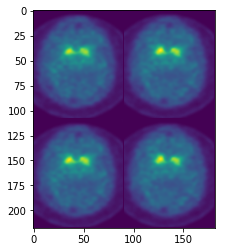

In [113]:
plt.imshow(im3841)

In [96]:
# loop through all the DICOM files
image_array_3437 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    im3435 = np.vstack([ds.pixel_array[34],ds.pixel_array[35]])
    im3637 = np.vstack([ds.pixel_array[36],ds.pixel_array[37]])
    im3437 = np.hstack([im3435,im3637])
    image_array_3437.append(im3437)
    #For debug corrupted image
    print(np.asarray(image_array_3437).shape)

0
(1, 218, 182)
1
(2, 218, 182)
2
(3, 218, 182)
3
(4, 218, 182)
4
(5, 218, 182)
5
(6, 218, 182)
6
(7, 218, 182)
7
(8, 218, 182)
8
(9, 218, 182)
9
(10, 218, 182)
10
(11, 218, 182)
11
(12, 218, 182)
12
(13, 218, 182)
13
(14, 218, 182)
14
(15, 218, 182)
15
(16, 218, 182)
16
(17, 218, 182)
17
(18, 218, 182)
18
(19, 218, 182)
19
(20, 218, 182)
20
(21, 218, 182)
21
(22, 218, 182)
22
(23, 218, 182)
23
(24, 218, 182)
24
(25, 218, 182)
25
(26, 218, 182)
26
(27, 218, 182)
27
(28, 218, 182)
28
(29, 218, 182)
29
(30, 218, 182)
30
(31, 218, 182)
31
(32, 218, 182)
32
(33, 218, 182)
33
(34, 218, 182)
34
(35, 218, 182)
35
(36, 218, 182)
36
(37, 218, 182)
37
(38, 218, 182)
38
(39, 218, 182)
39
(40, 218, 182)
40
(41, 218, 182)
41
(42, 218, 182)
42
(43, 218, 182)
43
(44, 218, 182)
44
(45, 218, 182)
45
(46, 218, 182)
46
(47, 218, 182)
47
(48, 218, 182)
48
(49, 218, 182)
49
(50, 218, 182)
50
(51, 218, 182)
51
(52, 218, 182)
52
(53, 218, 182)
53
(54, 218, 182)
54
(55, 218, 182)
55
(56, 218, 182)
56
(57, 218

(423, 218, 182)
423
(424, 218, 182)
424
(425, 218, 182)
425
(426, 218, 182)
426
(427, 218, 182)
427
(428, 218, 182)
428
(429, 218, 182)
429
(430, 218, 182)
430
(431, 218, 182)
431
(432, 218, 182)
432
(433, 218, 182)
433
(434, 218, 182)
434
(435, 218, 182)
435
(436, 218, 182)
436
(437, 218, 182)
437
(438, 218, 182)
438
(439, 218, 182)
439
(440, 218, 182)
440
(441, 218, 182)
441
(442, 218, 182)
442
(443, 218, 182)
443
(444, 218, 182)
444
(445, 218, 182)
445
(446, 218, 182)
446
(447, 218, 182)
447
(448, 218, 182)
448
(449, 218, 182)
449
(450, 218, 182)
450
(451, 218, 182)
451
(452, 218, 182)
452
(453, 218, 182)
453
(454, 218, 182)
454
(455, 218, 182)
455
(456, 218, 182)
456
(457, 218, 182)
457
(458, 218, 182)
458
(459, 218, 182)
459
(460, 218, 182)
460
(461, 218, 182)
461
(462, 218, 182)
462
(463, 218, 182)
463
(464, 218, 182)
464
(465, 218, 182)
465
(466, 218, 182)
466
(467, 218, 182)
467
(468, 218, 182)
468
(469, 218, 182)
469
(470, 218, 182)
470
(471, 218, 182)
471
(472, 218, 182)
472


In [97]:
# loop through all the DICOM files
image_array_3841 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    im3839 = np.vstack([ds.pixel_array[38],ds.pixel_array[39]])
    im4041 = np.vstack([ds.pixel_array[40],ds.pixel_array[41]])
    im3841 = np.hstack([im3839,im4041])
    image_array_3841.append(im3841)
    #For debug corrupted image
    print(np.asarray(image_array_3841).shape)

0
(1, 218, 182)
1
(2, 218, 182)
2
(3, 218, 182)
3
(4, 218, 182)
4
(5, 218, 182)
5
(6, 218, 182)
6
(7, 218, 182)
7
(8, 218, 182)
8
(9, 218, 182)
9
(10, 218, 182)
10
(11, 218, 182)
11
(12, 218, 182)
12
(13, 218, 182)
13
(14, 218, 182)
14
(15, 218, 182)
15
(16, 218, 182)
16
(17, 218, 182)
17
(18, 218, 182)
18
(19, 218, 182)
19
(20, 218, 182)
20
(21, 218, 182)
21
(22, 218, 182)
22
(23, 218, 182)
23
(24, 218, 182)
24
(25, 218, 182)
25
(26, 218, 182)
26
(27, 218, 182)
27
(28, 218, 182)
28
(29, 218, 182)
29
(30, 218, 182)
30
(31, 218, 182)
31
(32, 218, 182)
32
(33, 218, 182)
33
(34, 218, 182)
34
(35, 218, 182)
35
(36, 218, 182)
36
(37, 218, 182)
37
(38, 218, 182)
38
(39, 218, 182)
39
(40, 218, 182)
40
(41, 218, 182)
41
(42, 218, 182)
42
(43, 218, 182)
43
(44, 218, 182)
44
(45, 218, 182)
45
(46, 218, 182)
46
(47, 218, 182)
47
(48, 218, 182)
48
(49, 218, 182)
49
(50, 218, 182)
50
(51, 218, 182)
51
(52, 218, 182)
52
(53, 218, 182)
53
(54, 218, 182)
54
(55, 218, 182)
55
(56, 218, 182)
56
(57, 218

(427, 218, 182)
427
(428, 218, 182)
428
(429, 218, 182)
429
(430, 218, 182)
430
(431, 218, 182)
431
(432, 218, 182)
432
(433, 218, 182)
433
(434, 218, 182)
434
(435, 218, 182)
435
(436, 218, 182)
436
(437, 218, 182)
437
(438, 218, 182)
438
(439, 218, 182)
439
(440, 218, 182)
440
(441, 218, 182)
441
(442, 218, 182)
442
(443, 218, 182)
443
(444, 218, 182)
444
(445, 218, 182)
445
(446, 218, 182)
446
(447, 218, 182)
447
(448, 218, 182)
448
(449, 218, 182)
449
(450, 218, 182)
450
(451, 218, 182)
451
(452, 218, 182)
452
(453, 218, 182)
453
(454, 218, 182)
454
(455, 218, 182)
455
(456, 218, 182)
456
(457, 218, 182)
457
(458, 218, 182)
458
(459, 218, 182)
459
(460, 218, 182)
460
(461, 218, 182)
461
(462, 218, 182)
462
(463, 218, 182)
463
(464, 218, 182)
464
(465, 218, 182)
465
(466, 218, 182)
466
(467, 218, 182)
467
(468, 218, 182)
468
(469, 218, 182)
469
(470, 218, 182)
470
(471, 218, 182)
471
(472, 218, 182)
472
(473, 218, 182)
473
(474, 218, 182)
474
(475, 218, 182)
475
(476, 218, 182)
476


In [98]:
# loop through all the DICOM files
image_array_4245 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    im4243 = np.vstack([ds.pixel_array[42],ds.pixel_array[43]])
    im4445 = np.vstack([ds.pixel_array[44],ds.pixel_array[45]])
    im4245 = np.hstack([im4243,im4445])
    image_array_4245.append(im4245)
    #For debug corrupted image
    print(np.asarray(image_array_4245).shape)

0
(1, 218, 182)
1
(2, 218, 182)
2
(3, 218, 182)
3
(4, 218, 182)
4
(5, 218, 182)
5
(6, 218, 182)
6
(7, 218, 182)
7
(8, 218, 182)
8
(9, 218, 182)
9
(10, 218, 182)
10
(11, 218, 182)
11
(12, 218, 182)
12
(13, 218, 182)
13
(14, 218, 182)
14
(15, 218, 182)
15
(16, 218, 182)
16
(17, 218, 182)
17
(18, 218, 182)
18
(19, 218, 182)
19
(20, 218, 182)
20
(21, 218, 182)
21
(22, 218, 182)
22
(23, 218, 182)
23
(24, 218, 182)
24
(25, 218, 182)
25
(26, 218, 182)
26
(27, 218, 182)
27
(28, 218, 182)
28
(29, 218, 182)
29
(30, 218, 182)
30
(31, 218, 182)
31
(32, 218, 182)
32
(33, 218, 182)
33
(34, 218, 182)
34
(35, 218, 182)
35
(36, 218, 182)
36
(37, 218, 182)
37
(38, 218, 182)
38
(39, 218, 182)
39
(40, 218, 182)
40
(41, 218, 182)
41
(42, 218, 182)
42
(43, 218, 182)
43
(44, 218, 182)
44
(45, 218, 182)
45
(46, 218, 182)
46
(47, 218, 182)
47
(48, 218, 182)
48
(49, 218, 182)
49
(50, 218, 182)
50
(51, 218, 182)
51
(52, 218, 182)
52
(53, 218, 182)
53
(54, 218, 182)
54
(55, 218, 182)
55
(56, 218, 182)
56
(57, 218

(423, 218, 182)
423
(424, 218, 182)
424
(425, 218, 182)
425
(426, 218, 182)
426
(427, 218, 182)
427
(428, 218, 182)
428
(429, 218, 182)
429
(430, 218, 182)
430
(431, 218, 182)
431
(432, 218, 182)
432
(433, 218, 182)
433
(434, 218, 182)
434
(435, 218, 182)
435
(436, 218, 182)
436
(437, 218, 182)
437
(438, 218, 182)
438
(439, 218, 182)
439
(440, 218, 182)
440
(441, 218, 182)
441
(442, 218, 182)
442
(443, 218, 182)
443
(444, 218, 182)
444
(445, 218, 182)
445
(446, 218, 182)
446
(447, 218, 182)
447
(448, 218, 182)
448
(449, 218, 182)
449
(450, 218, 182)
450
(451, 218, 182)
451
(452, 218, 182)
452
(453, 218, 182)
453
(454, 218, 182)
454
(455, 218, 182)
455
(456, 218, 182)
456
(457, 218, 182)
457
(458, 218, 182)
458
(459, 218, 182)
459
(460, 218, 182)
460
(461, 218, 182)
461
(462, 218, 182)
462
(463, 218, 182)
463
(464, 218, 182)
464
(465, 218, 182)
465
(466, 218, 182)
466
(467, 218, 182)
467
(468, 218, 182)
468
(469, 218, 182)
469
(470, 218, 182)
470
(471, 218, 182)
471
(472, 218, 182)
472


In [99]:
#Stack up to made RGB, so we can use pretrain model
image_array = np.stack([image_array_3437, image_array_3841, image_array_4245], axis=3)

For NORMAL Image

In [13]:
# loop through all the DICOM files
image_array_39 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39.append(ds.pixel_array[39])
    #For debug corrupted image
    print(np.asarray(image_array_39).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(444, 109, 91)
444
(445, 109, 91)
445
(446, 109, 91)
446
(447, 109, 91)
447
(448, 109, 91)
448
(449, 109, 91)
449
(450, 109, 91)
450
(451, 109, 91)
451
(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 9

In [14]:
# loop through all the DICOM files
image_array_40 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40.append(ds.pixel_array[40])
    #For debug corrupted image
    print(np.asarray(image_array_40).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(444, 109, 91)
444
(445, 109, 91)
445
(446, 109, 91)
446
(447, 109, 91)
447
(448, 109, 91)
448
(449, 109, 91)
449
(450, 109, 91)
450
(451, 109, 91)
451
(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 9

In [15]:
# loop through all the DICOM files
image_array_41 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41.append(ds.pixel_array[41])
    #For debug corrupted image
    print(np.asarray(image_array_41).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(444, 109, 91)
444
(445, 109, 91)
445
(446, 109, 91)
446
(447, 109, 91)
447
(448, 109, 91)
448
(449, 109, 91)
449
(450, 109, 91)
450
(451, 109, 91)
451
(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 9

In [16]:
#Stack up to made RGB, so we can use pretrain model
image_array = np.stack([image_array_40, image_array_40, image_array_40], axis=3)

In [100]:
image_array.shape

(602, 218, 182, 3)

In [101]:
#Check matched data-result by Image ID number
lstFilesDCM[0:5]

['./PPMI/3432/Reconstructed_DaTSCAN/2013-10-02_15_46_11.0/S215853/PPMI_3432_NM_Reconstructed_DaTSCAN_Br_20140410130407216_1_S215853_I419661.dcm',
 './PPMI 8/3418/Reconstructed_DaTSCAN/2015-05-19_15_37_04.0/S413733/PPMI_3418_NM_Reconstructed_DaTSCAN_Br_20160425125751526_1_S413733_I693014.dcm',
 './PPMI 2/3542/Reconstructed_DaTSCAN/2015-01-14_15_13_08.0/S257810/PPMI_3542_NM_Reconstructed_DaTSCAN_Br_20150602100527364_1_S257810_I495311.dcm',
 './PPMI 8/3792/Reconstructed_DaTSCAN/2014-02-26_14_31_07.0/S215536/PPMI_3792_NM_Reconstructed_DaTSCAN_Br_20140725131304300_1_S215536_I436873.dcm',
 './PPMI 2/4011/Reconstructed_DaTSCAN/2014-02-14_13_26_42.0/S231213/PPMI_4011_NM_Reconstructed_DaTSCAN_Br_20141006105304428_1_S231213_I446142.dcm']

In [102]:
df1to4[0:5]

,Image Data ID,Group,Filenames,TOTAL11,TOTAL12,TOTAL2,TOTAL3,TOTAL4,TOTAL
0,419661,PD,./PPMI/3432/Reconstructed_DaTSCAN/2013-10-02_1...,11.0,0.0,0.0,46.0,0.0,57.0
1,693014,PD,./PPMI 8/3418/Reconstructed_DaTSCAN/2015-05-19...,2.0,0.0,0.0,48.0,0.0,50.0
2,495311,PD,./PPMI 2/3542/Reconstructed_DaTSCAN/2015-01-14...,8.0,7.0,2.0,37.0,0.0,54.0
3,436873,PD,./PPMI 8/3792/Reconstructed_DaTSCAN/2014-02-26...,4.0,1.0,4.0,17.0,0.0,26.0
4,446142,PD,./PPMI 2/4011/Reconstructed_DaTSCAN/2014-02-14...,5.0,0.0,4.0,23.0,0.0,32.0


In [228]:
y = np.asarray(pd.factorize(df1to4['TOTAL3']))[0]
print(y)

[ 0  1  2  3  4  5  6  7  8  2  9 10 11 12  5 13 14 15 16 14  6 17  8 15 18 16 19 20 14  4 21  1 22 23 24 23
 25 26 27 12 21  3 12 21 14 28 18  7 29 14 24 16 27 26 15  3 14 17 30 15 31 15 32  7 28 33 22  1 34 14 13  2
  3  9 14 35 21 36 25 34  8  4  5 20  3  4  5 28  2  5  6 31 31 15 24 24 18 29  5  0 31 22 20 37 36 22 16 21
 21  5  9 26 14 29 20 20 29 20 33 29  9 31  3 21 29 17 38 17  4  8 24 29 39  5 13 26 40 26 41 13 42 26 15 43
 15 30 34 20 38 35 19  7 23 29  4 18 24 42  5  4 38  3 19 29 25  0 14 28 11 23 26 25 29  5  3 39 35 17 17  3
  4 24  3 20 17 44 14 18 20 36 20 15 25 38 45 12  6  0 33  3  7 13 46 17 29 20 31  4 38 15  2 31 24 21 42 27
  4 23 15 18  3 16 21  2 25 25  7 22 38  4 27  5  5  2 33 20 27 29  4 38 40  8 12 38  1  5 15 22 15 47 25  7
 22 21  0  2  5 20 29 26  5 13 12  7  7 12 29  2  6  9 21  0 34  3  3 20 25 17 30 18 36 29 12 19 14  5  6  4
 42 17 31 16 35 33 16 39 15  9 18 28 44  8  8 13 26 15 29 15 29 31 16  2 16 33 15  7  4 22 48 46 24 10 39 33
 27 28 49 17 50  9 

In [229]:
y.dtype

dtype('int64')

In [230]:
y = y.astype('float')
y.dtype

dtype('float64')

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, y, test_size=0.1)

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [233]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(432, 218, 182, 3) (109, 218, 182, 3) (61, 218, 182, 3) (432,) (109,) (61,)


In [234]:
arch=resnet34
#arch=inceptionv4
bs=64
sz=218
#tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on)
tfms = tfms_from_model(arch, sz,crop_type=CropType.NO)
data = ImageClassifierData.from_arrays('.', bs=bs, trn=(X_train,y_train), val=(X_val,y_val), test=X_test, tfms=tfms)


In [235]:
head_res_34 = nn.Sequential(Flatten(),
                          nn.Linear(25088, 1))
head_incep_4 = nn.Sequential(Flatten(),
                          nn.Linear(1001, 1))
learn = ConvLearner.pretrained(arch, data, precompute=False, custom_head=head_res_34, ps=0.6)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [181]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 218, 218]),
                           ('output_shape', [-1, 64, 109, 109]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 109, 109]),
                           ('output_shape', [-1, 64, 109, 109]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 109, 109]),
                           ('output_shape', [-1, 64, 109, 109]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 109, 109]),
                           ('output_shape', [-1, 64, 55, 55]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 55, 

In [111]:
learn.load('inceptionv4')

In [209]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      613945.060337 354232.379587 0.0       
    1      429015.008507 479693.571101 0.0                  
    2      388077.370996 219825.425172 0.0                  



[array([219825.42517]), 0.0]

In [210]:
learn.fit(1e-3, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      94522.381467 76327.033114 0.0       
    1      76147.912421 17545.756648 0.0                    
    2      59901.59344 33016.010536 0.0                     
    3      49094.973516 22950.792431 0.0                    
    4      40604.723693 15561.709647 0.0                    
    5      35471.640961 22643.204128 0.0                    
    6      32786.47355 14000.210382 0.0                     
    7      28851.369837 11711.747285 0.0                    
    8      25099.073253 6670.622339 0.0                     
    9      21769.912252 7264.018743 0.0                     



[array([7264.01874]), 0.0]

In [184]:
learn.save('inceptionv4')

In [116]:
learn.load('inceptionv4')

In [189]:
learn.freeze_to(-2)

In [213]:
learn.fit(1e-3, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      72833.184231 104643.191084 0.0       
    1      70328.282489 72624.487672 0.0                    
    2      56929.112783 11421.471196 0.0                    
    3      45047.100183 7465.610992 0.0                     
    4      38211.119272 23031.576011 0.0                    



[array([23031.57601]), 0.0]

In [238]:
learn.unfreeze()

In [239]:
learn.fit(1e-3, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      12.349788  649.945342 0.009174  
    1      11.650205  197.901933 0.009174               
    2      11.567085  11.71093   0.009174               
    3      11.492213  25.809416  0.009174               
    4      11.432256  18.455278  0.009174               



[array([18.45528]), 0.009174311926605505]

In [216]:
learn.fit(1e-4, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      11.840013  14.59314   0.0       
    1      11.245956  14.911466  0.0                    
    2      10.567946  13.99057   0.0                    



[array([13.99057]), 0.0]

In [240]:
lr = 1e-4
lrs = np.array([lr/9,lr/3,lr])

In [46]:
learn.bs=64

In [135]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      14.519212  nan        0.009174  



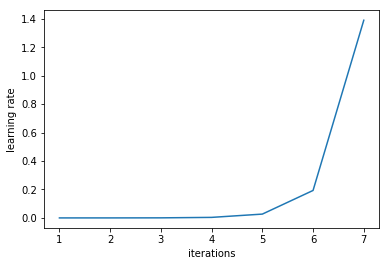

In [136]:
learn.sched.plot_lr()

In [241]:
#learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      10.676524  11.296311  0.009174  
    1      10.668763  11.025475  0.009174               
    2      10.667388  11.06237   0.009174               
    3      10.688512  11.083687  0.009174               
    4      10.731247  10.925837  0.009174               
    5      10.776572  11.012681  0.009174               
    6      10.766456  11.081215  0.009174               
    7      10.728156  11.050252  0.009174               
    8      10.715864  11.001895  0.009174               
    9      10.701422  10.982153  0.009174               
    10     10.684826  10.972917  0.009174               
    11     10.686327  10.99528   0.009174               
    12     10.671181  10.998587  0.009174               



[array([10.99859]), 0.009174311926605505]

In [ ]:
learn.save('2x2_inceptionv4')

In [242]:
learn.opt_fn = optim.RMSprop

In [243]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      10.892018  11.318129  0.009174  
    1      10.908043  11.008133  0.009174               
    2      10.890493  10.911343  0.009174               
    3      10.819597  11.184884  0.009174               
    4      10.811254  11.054735  0.009174               
    5      10.799602  10.984231  0.009174               
    6      10.775835  10.991989  0.009174               



[array([10.99199]), 0.009174311926605505]

In [198]:
lr = 1e-4

In [206]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy               
    0      6.192356   15.046552  0.0       
    1      6.368508   15.758846  0.0                    
    2      6.335613   15.096358  0.0                    
    3      6.058738   15.177938  0.0                    
    4      5.94645    14.578083  0.0                    
    5      5.828356   14.533776  0.0                    
    6      5.707415   14.514527  0.0                    



[array([14.51453]), 0.0]

In [202]:
learn.save('2x2_resnet_34')

In [236]:
learn.load('2x2_resnet_34')

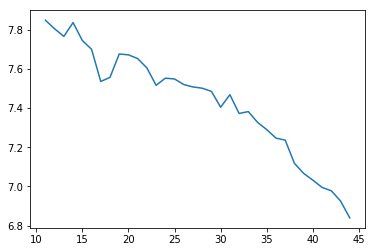

In [203]:
learn.sched.plot_loss()

In [158]:
learn.opt_fn = optim.RMSprop

In [159]:
lr=1e-6

In [160]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.964733   0.578158   0.862385  
    1      0.965129   0.644113   0.862385                
    2      0.977292   0.646538   0.862385                
    3      0.972972   0.662854   0.862385                
    4      0.966692   0.628489   0.862385                
    5      0.969024   0.610157   0.862385                
    6      0.969361   0.64765    0.862385                



[array([0.64765]), 0.8623853265692335]

In [244]:
y_pred = learn.predict(is_test=X_test.any())

In [245]:
y_pred

array([[19.76291],
       [19.97697],
       [19.85434],
       [20.05226],
       [20.0011 ],
       [19.81145],
       [19.79058],
       [20.03429],
       [19.92389],
       [19.47249],
       [19.81744],
       [19.91861],
       [19.28616],
       [19.52623],
       [19.47799],
       [19.77277],
       [20.05107],
       [19.73617],
       [19.6784 ],
       [20.00154],
       [19.60475],
       [20.05351],
       [20.03688],
       [19.6014 ],
       [19.92724],
       [19.68641],
       [15.55148],
       [19.31514],
       [19.93826],
       [19.95396],
       [19.65373],
       [19.57966],
       [19.36751],
       [19.82567],
       [20.06381],
       [20.06659],
       [19.95282],
       [18.9948 ],
       [19.575  ],
       [20.01708],
       [19.67216],
       [23.77299],
       [19.80888],
       [23.22706],
       [19.58781],
       [23.62419],
       [19.87894],
       [19.70263],
       [20.02672],
       [19.89923],
       [19.9721 ],
       [19.30637],
       [19.6

In [246]:
y_test

array([41.,  9., 15., 32.,  4., 35., 26., 17.,  8., 27., 16.,  2.,  7., 38.,  6., 28.,  4., 27., 28.,  3.,
       29.,  9., 23.,  6., 15., 42.,  7., 29.,  4., 15.,  4., 15., 19.,  0., 33., 25., 23., 15.,  7.,  0.,
       12., 16., 19., 15., 53., 42., 15., 27., 21., 21., 22., 18., 14., 25., 14., 28., 23., 29., 36., 38.,
       21.])

In [247]:
df_pred = pd.DataFrame(y_test,columns=['TEST'])
df_y_pred = pd.DataFrame(y_pred,columns=['PRED'])

In [248]:
df_pred = df_pred.join(df_y_pred)

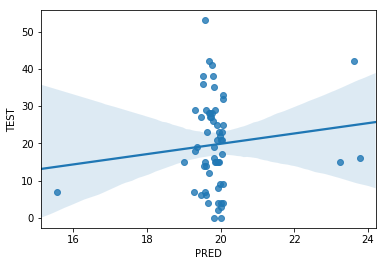

In [249]:
sns.regplot(x='PRED' ,y='TEST', data=df_pred)